In [1]:
%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.append('/home/loringm/proliferation-and-track')
from tracking import find_match, map_matches

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import zarr
import torch
from scipy import ndimage

In [4]:
zarr_dir = '/home/loringm/Downloads/SIMULATED_DATASET/01/data.n5'
data = zarr.open(zarr_dir)

In [5]:
data.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='GT (150, 59, 349, 639…

In [6]:
model_dir = 'first_model_attempt.pt'

net = torch.load(model_dir)

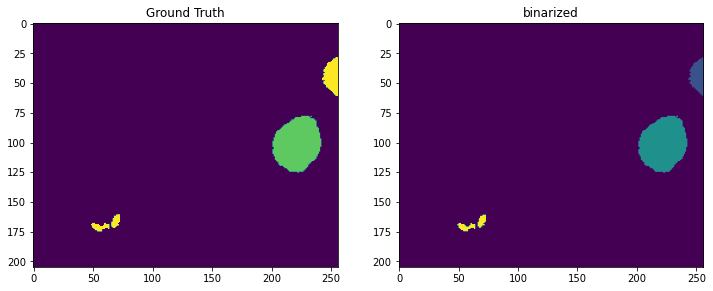

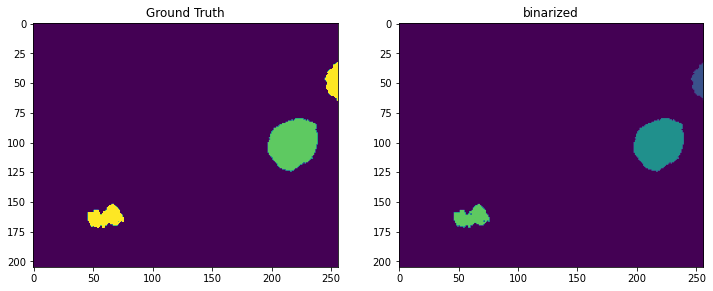

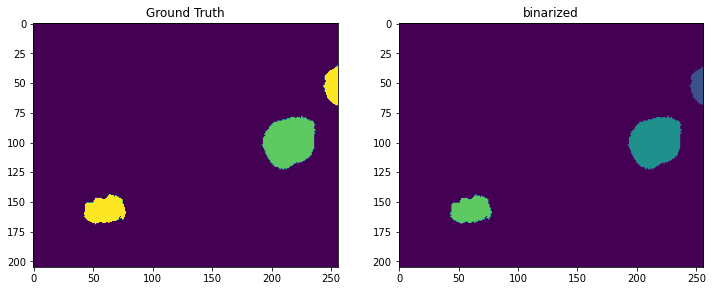

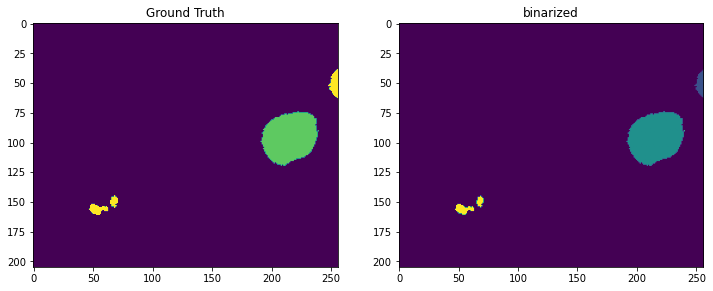

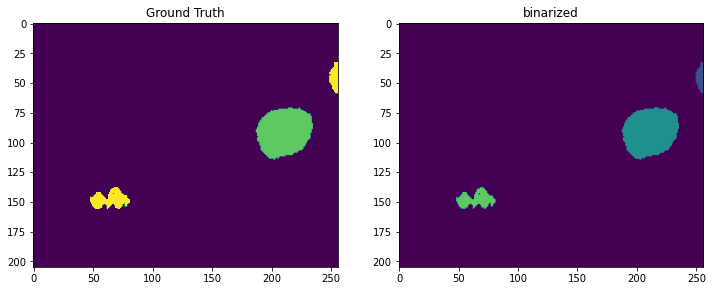

In [7]:
imgsize = (5, 1, 256, 256)
imgs = data['GT'][20:25,30,144:400,144:400]
for i in range(5):
    
    fig, ax = plt.subplots(1,2, figsize=(12,8))

    ax[0].imshow(imgs[i], vmin=0, vmax=4)
    ax[0].set_title("Ground Truth")
    
    bnrimage = np.array(imgs[i]>0, dtype=np.int8)
    labeledbnryimage = ndimage.label(bnrimage)[0]

    ax[1].imshow(labeledbnryimage, vmin=0, vmax=4)
    ax[1].set_title('binarized')

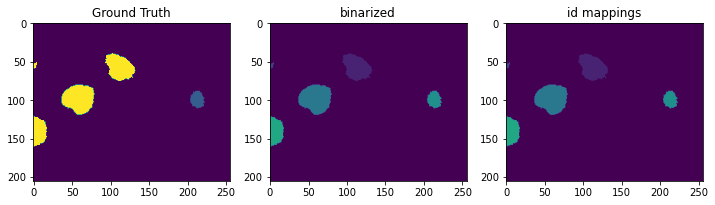

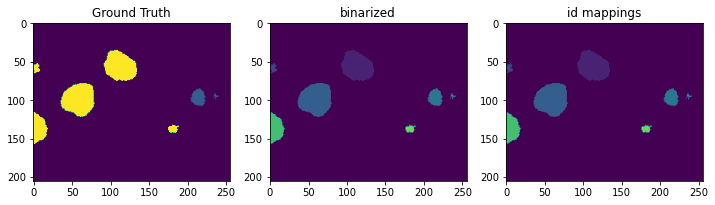

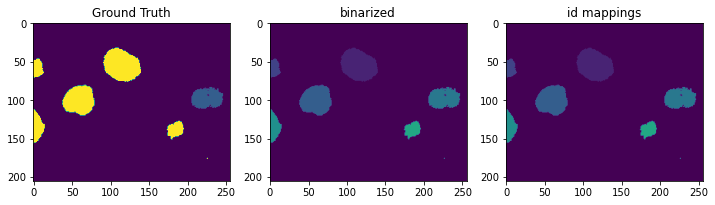

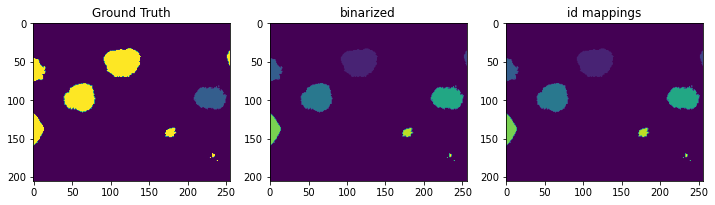

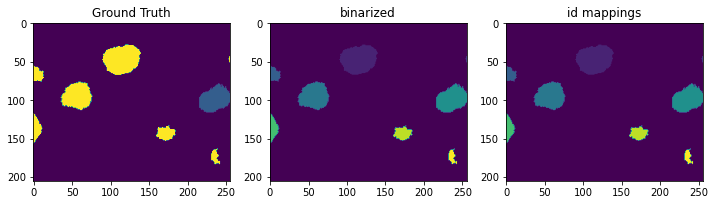

In [8]:
imgsize = (5, 1, 256, 256)
imgs = data['GT'][39:45,30,144:400,144:400]
predictions = []
for i in range(5):
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))

    ax[0].imshow(imgs[i], vmin=0, vmax=10)
    ax[0].set_title("Ground Truth")
    
    bnrimage = np.array(imgs[i]>0, dtype=np.int8)
    labeledbnryimage = ndimage.label(bnrimage)[0]

    ax[1].imshow(labeledbnryimage, vmin=0, vmax=10)
    ax[1].set_title('binarized')

            
    bnrimage2 = np.array(imgs[i-1]>0, dtype=np.int8)
    labeledbnryimage2 = ndimage.label(bnrimage)[0]

    match_dic, l1_shape = find_match(labeledbnryimage,labeledbnryimage2)
    predicted_image = map_matches(labeledbnryimage, match_dic, l1_shape)
    predictions.append(predicted_image)

    ax[2].imshow(predicted_image, vmin=0, vmax=10)
    ax[2].set_title('id mappings')    
    
    plt.show()

In [9]:
xs = []
ys = []
t = []
for i in range(len(predictions)):
    x,y = np.mean(np.where(predictions[i]==4), axis=1)
    xs.append(x)
    ys.append(y)
    t.append(i)

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
df = pd.DataFrame({'time' : t, 'x' : xs, 'y':ys})

(50.0, 250.0)

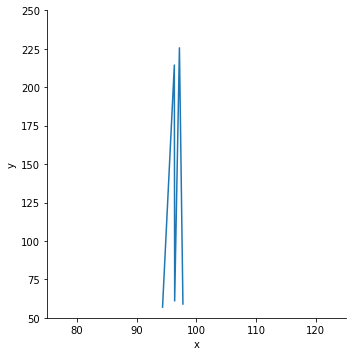

In [12]:
sns.relplot(data=df, x='x',y='y', kind="line")
plt.xlim(75,125)
plt.ylim(50,250)

In [13]:
imgs = data['GT'][:,30,144:400,144:400]
imgs.shape

(150, 205, 256)

In [ ]:
bnrimages = []
for i in imgs:
    bnrimages.append(np.array(imgs[i]>0, dtype=np.int8))

In [ ]:
bnrimages = [np.array(imgs[i]>0, dtype=np.int8) for i in imgs]

In [ ]:
plt.imshow(bnrimages[0])

In [ ]:
plt.imshow(bnrimages[5])

In [ ]:
plt.imshow(imgs[20])